In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [6]:
dp = pd.read_csv(r'C:\Users\USER\Desktop\Portfolio\wc_final_dataset.csv')

In [7]:
dp.head()

,Team1,Team2,Winner,Margin,Ground,Match Date,T-20 Int Match,Team1 Avg Batting Ranking,Team2 Avg Batting Ranking,Team1 Avg Bowling Ranking,Team2 Avg Bowling Ranking,Team1 Total WCs participated,Team1 Total WCs won,Team2 Total WCs participated,Team2 Total WCs won,Team1 win % over Team2
0,India,Pakistan,India,5 runs,Johannesburg,2007/09/24,T20I # 46,67.13,65.87,80.67,63.40,0,0,0,0,100.0
1,Australia,India,India,15 runs,Durban,2007/09/22,T20I # 45,66.54,70.20,58.77,82.40,0,0,0,0,0.0
2,New Zealand,Pakistan,Pakistan,6 wickets,Cape Town,2007/09/22,T20I # 44,66.07,67.20,68.60,66.60,0,0,0,0,0.0
3,South Africa,India,India,37 runs,Durban,2007/09/20,T20I # 43,69.53,75.67,76.93,86.33,0,0,0,0,0.0
4,Bangladesh,Pakistan,Pakistan,4 wickets,Cape Town,2007/09/20,T20I # 42,75.53,69.67,70.60,68.33,0,0,0,0,0.0


In [8]:
print(dp.dtypes)

Team1                            object
Team2                            object
Winner                           object
Margin                           object
Ground                           object
Match Date                       object
T-20 Int Match                   object
Team1 Avg Batting Ranking       float64
Team2 Avg Batting Ranking       float64
Team1 Avg Bowling Ranking       float64
Team2 Avg Bowling Ranking       float64
Team1 Total WCs participated      int64
Team1 Total WCs won               int64
Team2 Total WCs participated      int64
Team2 Total WCs won               int64
Team1 win % over Team2          float64
dtype: object


In [9]:
for col in dp.columns:
    pct_missing = np.mean(dp[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Team1 - 0%
Team2 - 0%
Winner - 0%
Margin - 0%
Ground - 0%
Match Date - 0%
T-20 Int Match - 0%
Team1 Avg Batting Ranking - 0%
Team2 Avg Batting Ranking - 0%
Team1 Avg Bowling Ranking - 0%
Team2 Avg Bowling Ranking - 0%
Team1 Total WCs participated - 0%
Team1 Total WCs won - 0%
Team2 Total WCs participated - 0%
Team2 Total WCs won - 0%
Team1 win % over Team2 - 0%


In [13]:
# Using factorize - this assigns a random numeric value for each unique categorical value

dp.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,Team1,Team2,Winner,Margin,Ground,Match Date,T-20 Int Match,Team1 Avg Batting Ranking,Team2 Avg Batting Ranking,Team1 Avg Bowling Ranking,Team2 Avg Bowling Ranking,Team1 Total WCs participated,Team1 Total WCs won,Team2 Total WCs participated,Team2 Total WCs won,Team1 win % over Team2
Team1,1.000000,0.191940,0.536675,0.066337,0.275796,0.342870,0.347212,0.284674,0.271204,0.277476,0.182173,-0.259731,-0.188224,0.103479,-0.028441,-0.183559
Team2,0.191940,1.000000,0.457159,0.079632,0.182987,0.312341,0.317121,0.230783,0.162939,0.295280,0.025735,0.197893,0.175570,-0.332417,-0.408914,-0.199625
Winner,0.536675,0.457159,1.000000,0.061624,0.218234,0.265532,0.269570,0.216228,0.237105,0.235895,0.069059,-0.074494,-0.100406,-0.137910,-0.170663,-0.089305
Margin,0.066337,0.079632,0.061624,1.000000,0.172416,0.249662,0.249582,0.222301,0.142185,0.207351,0.181344,0.256331,0.125031,0.186203,0.027795,0.064560
Ground,0.275796,0.182987,0.218234,0.172416,1.000000,0.803405,0.799271,0.683808,0.696260,0.604400,0.689105,0.555072,0.083349,0.606968,0.167987,0.308047
Match Date,0.342870,0.312341,0.265532,0.249662,0.803405,1.000000,0.999677,0.854856,0.730807,0.757705,0.679524,0.713353,0.307101,0.643227,0.186687,0.371477
T-20 Int Match,0.347212,0.317121,0.269570,0.249582,0.799271,0.999677,1.000000,0.854520,0.728086,0.754359,0.674793,0.708925,0.305411,0.639204,0.184210,0.366560
Team1 Avg Batting Ranking,0.284674,0.230783,0.216228,0.222301,0.683808,0.854856,0.854520,1.000000,0.614103,0.690340,0.631836,0.609968,0.249899,0.575533,0.169204,0.363302
Team2 Avg Batting Ranking,0.271204,0.162939,0.237105,0.142185,0.696260,0.730807,0.728086,0.614103,1.000000,0.594973,0.697994,0.521572,0.211993,0.536699,0.203013,0.287011
Team1 Avg Bowling Ranking,0.277476,0.295280,0.235895,0.207351,0.604400,0.757705,0.754359,0.690340,0.594973,1.000000,0.538460,0.550998,0.183162,0.468924,0.117744,0.296157


In [15]:
dp.apply(lambda x: x.factorize()[0]).corr(method='kendall')

,Team1,Team2,Winner,Margin,Ground,Match Date,T-20 Int Match,Team1 Avg Batting Ranking,Team2 Avg Batting Ranking,Team1 Avg Bowling Ranking,Team2 Avg Bowling Ranking,Team1 Total WCs participated,Team1 Total WCs won,Team2 Total WCs participated,Team2 Total WCs won,Team1 win % over Team2
Team1,1.000000,0.125314,0.391754,0.054960,0.164796,0.206701,0.206606,0.169557,0.165315,0.174179,0.098995,-0.162183,-0.213268,0.047427,-0.028295,-0.200484
Team2,0.125314,1.000000,0.328090,0.038433,0.124291,0.182072,0.181600,0.131406,0.110818,0.176661,0.030253,0.124395,0.114929,-0.196277,-0.425638,-0.157708
Winner,0.391754,0.328090,1.000000,0.040698,0.141019,0.156816,0.156736,0.125318,0.146179,0.153158,0.027769,-0.029754,-0.117473,-0.099971,-0.181998,-0.099044
Margin,0.054960,0.038433,0.040698,1.000000,0.117526,0.160415,0.160509,0.150287,0.103577,0.140629,0.139616,0.161211,0.037968,0.133145,0.026958,0.014918
Ground,0.164796,0.124291,0.141019,0.117526,1.000000,0.765100,0.764123,0.611421,0.606363,0.554351,0.608504,0.518839,0.091288,0.541194,0.154317,0.155987
Match Date,0.206701,0.182072,0.156816,0.160415,0.765100,1.000000,0.998431,0.772246,0.662926,0.690524,0.630344,0.622485,0.220966,0.554769,0.140547,0.150061
T-20 Int Match,0.206606,0.181600,0.156736,0.160509,0.764123,0.998431,1.000000,0.772734,0.663787,0.690820,0.631357,0.621106,0.219546,0.554090,0.140236,0.149734
Team1 Avg Batting Ranking,0.169557,0.131406,0.125318,0.150287,0.611421,0.772246,0.772734,1.000000,0.527162,0.603303,0.535772,0.518760,0.187471,0.474912,0.140299,0.150492
Team2 Avg Batting Ranking,0.165315,0.110818,0.146179,0.103577,0.606363,0.662926,0.663787,0.527162,1.000000,0.504318,0.608201,0.441352,0.165852,0.451896,0.160766,0.122836
Team1 Avg Bowling Ranking,0.174179,0.176661,0.153158,0.140629,0.554351,0.690524,0.690820,0.603303,0.504318,1.000000,0.459776,0.459253,0.140896,0.391358,0.090628,0.104301


<Axes: >

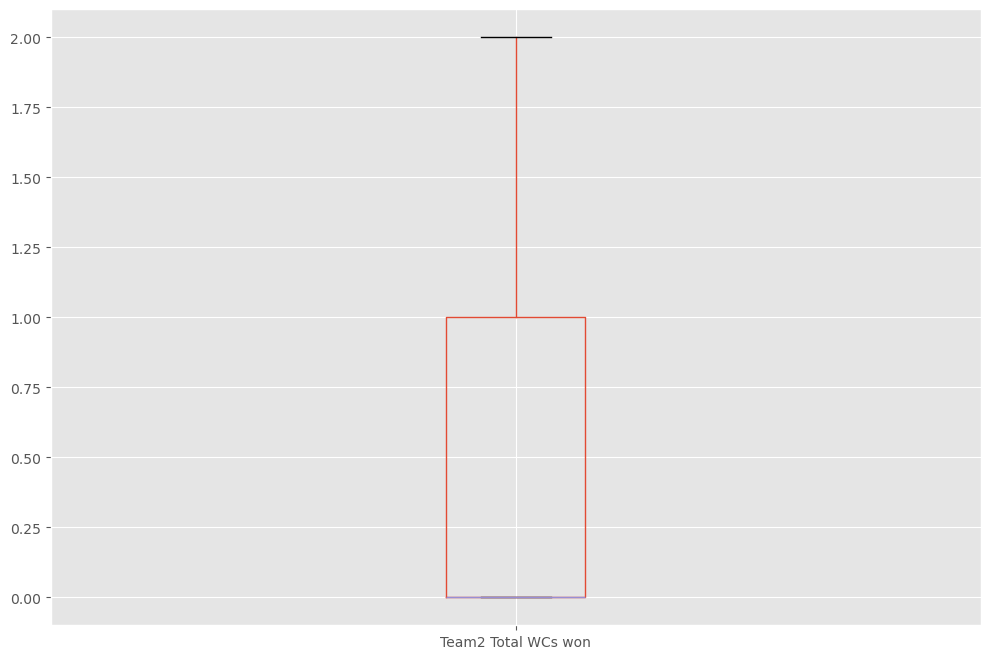

In [15]:
dp.boxplot(column=['Team2 Total WCs won'])

<Axes: >

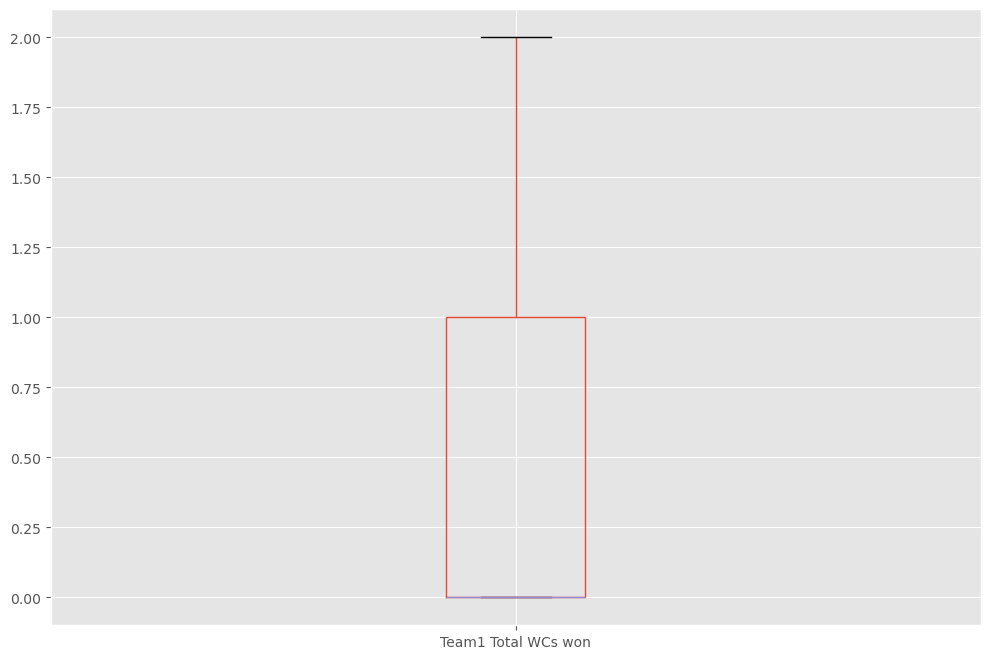

In [17]:
dp.boxplot(column=['Team1 Total WCs won'])

<Axes: xlabel='Team1 Total WCs participated', ylabel='Team1 Total WCs won'>

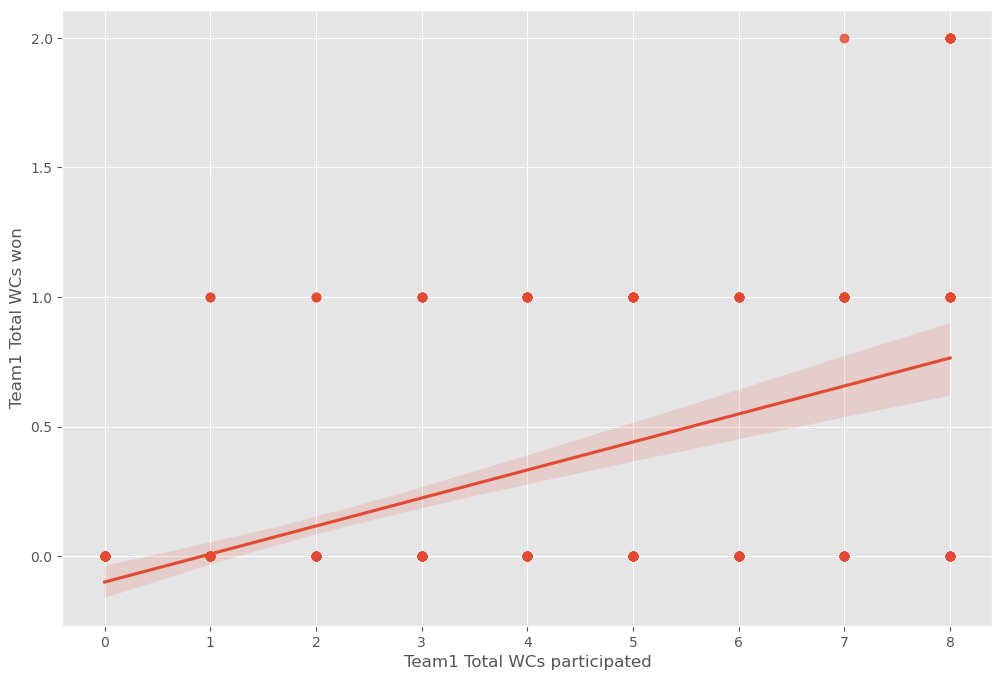

In [19]:
sns.regplot(x="Team1 Total WCs participated", y="Team1 Total WCs won", data=dp)

<Axes: xlabel='Team2 Total WCs participated', ylabel='Team2 Total WCs won'>

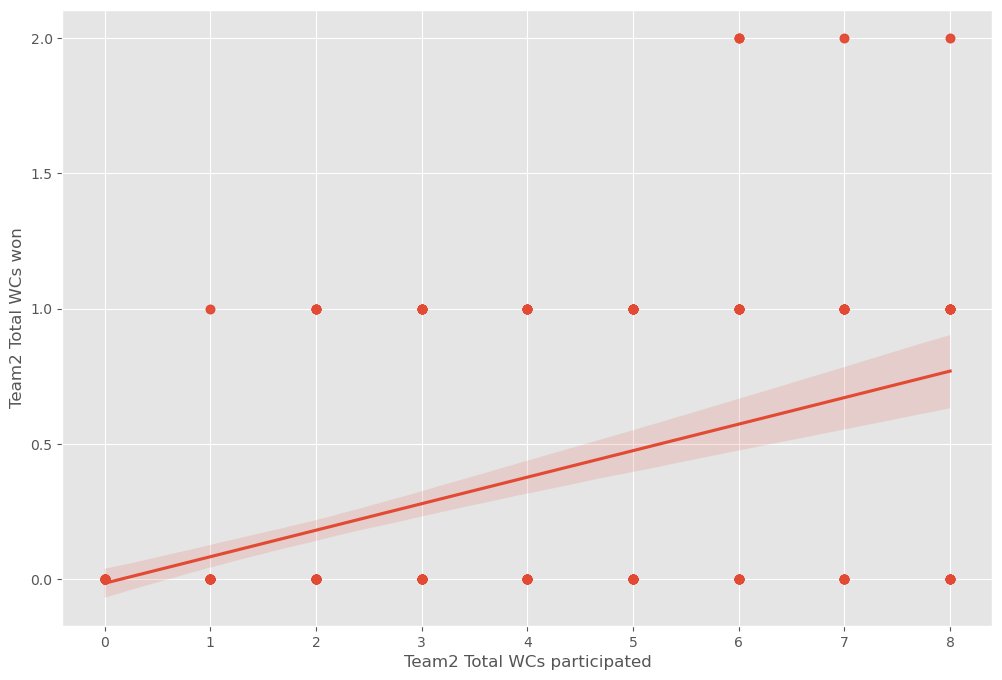

In [21]:
sns.regplot(x="Team2 Total WCs participated", y="Team2 Total WCs won", data=dp)

In [ ]:
correlation_matrix = dp.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for London Borough")

plt.xlabel("Population")

plt.ylabel("population")

plt.show()